In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#1. Load the dataset to pandas dataframe and print names of columns
df = pd.read_csv("C:/Users/ammar.aamir/Documents/Updated Dataset/Dataset/chronic_kidney_disease_updated.csv")
df.columns[:]

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [48]:
#2. Display first 5 rows in the dataset
df[0:5]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
2,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd


In [65]:
"""3. Check if dataset is in cleaned form else clean it. 
      Check Diabetes Mellitus(dm) variable and print what type of values it has """
df.dm.unique()

array([nan, 'yes', 'no'], dtype=object)

In [64]:
"""4. The dataset is not in clean form. 
    Write a function that takes pandas dataframe as an input, remove these characters i-e ( "\t", " ") from the string
    value and replace with "nan" if the string value has only unicode characters i-e ("?"). 
    The function should apply this transformation to all columns in dataframe and for cross check display unique 
    values of Diabetes Mellitus(dm). """
def cleanDataSet(dat):
    func = lambda x: str(x).strip()
    dat = dat.applymap(func)
    dat = dat.replace("?", np.nan)
    dat = dat.replace("nan", np.nan)
    return dat
df = cleanDataSet(df)
df.dm.unique()

array([nan, 'yes', 'no'], dtype=object)

In [66]:
"""5. Change datatype to Numerical of following columns in Dataframe. 
columns = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'] """

columnsF = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
for c in columnsF:
    df[c] = df[c].astype(float)

Normal: 60
Abnormal: 47


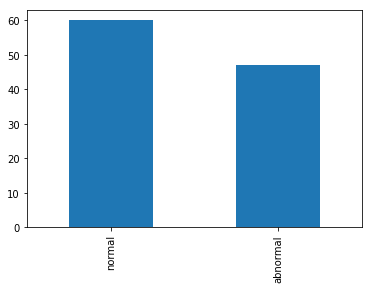

In [62]:
#6. Count the number of normal or abnormal red blood cells people having Chronic Kidney Disease(CKD).
normalCount = 0
abnormalCount = 0
for i in range(0,len(df.rbc)):
    if df['class'][i] == "ckd":
        ckdCount.append(df['class'][i])
        if df.rbc[i] == 'normal':
            normalCount+=1
        if df.rbc[i] == 'abnormal':
            abnormalCount +=1
print ("Normal: " + str(normalCount))
print ("Abnormal: " + str(abnormalCount))
df[df["class"]=="ckd"].rbc.value_counts().plot(kind='bar')
plt.show()

In [53]:
#7. Display maximum blood pressure having Chronic Kidney Disease(CKD).
m = 0
for i in range(len(df.bp)):
    if df["class"][i] == "ckd":
        if df.bp[i] > m:
            m = df.bp[i]
m

180.0

In [22]:
#8. Create a csv file of cleaned data in dataframe with name "clean_chronic_kidney_disease.csv"
df.to_csv("clean_ckd_dataset.csv", sep=',', index = False)